In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("adult 3.csv")

# Show first 5 rows
df.head(5)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
# Step 2: Fix column names
df.columns = df.columns.str.lower().str.replace("-", "_")

# Verify
print(df.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [8]:
# Step 3: Basic dataset info
print("Shape of dataset:", df.shape)
print("\nColumn info:")
print(df.info())
print("\nSummary statistics (numerical columns):")
print(df.describe())


Shape of dataset: (48842, 15)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None

Summary statistics (numeri

In [9]:
# Step 4: Clean whitespace in strings
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Check for "?" placeholders
print("\nColumns containing '?' and their counts:")
for col in df.select_dtypes(include='object').columns:
    print(col, (df[col] == '?').sum())


C:\Users\heyra\AppData\Local\Temp\ipykernel_2200\1362293023.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)



Columns containing '?' and their counts:
workclass 2799
education 0
marital_status 0
occupation 2809
relationship 0
race 0
gender 0
native_country 857
income 0


In [10]:
# Step 5: Impute
df['workclass'] = df['workclass'].replace('?', 'Unknown')
df['occupation'] = df['occupation'].replace('?', 'Unknown')
df['native_country'] = df['native_country'].replace('?', df['native_country'].mode()[0])

# Verify
for col in ['workclass', 'occupation', 'native_country']:
    print(f"{col} - '?' count after imputation:", (df[col] == '?').sum())


workclass - '?' count after imputation: 0
occupation - '?' count after imputation: 0
native_country - '?' count after imputation: 0


In [11]:
# Step 6: Check and remove duplicates
print("Duplicate rows before removal:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

print("Duplicate rows after removal:", df.duplicated().sum())
print("New shape of dataset:", df.shape)


Duplicate rows before removal: 52
Duplicate rows after removal: 0
New shape of dataset: (48790, 15)


In [12]:
# Step 7: Drop fnlwgt
df = df.drop(columns=['fnlwgt'])
print("Columns after dropping fnlwgt:", df.columns)


Columns after dropping fnlwgt: Index(['age', 'workclass', 'education', 'educational_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')


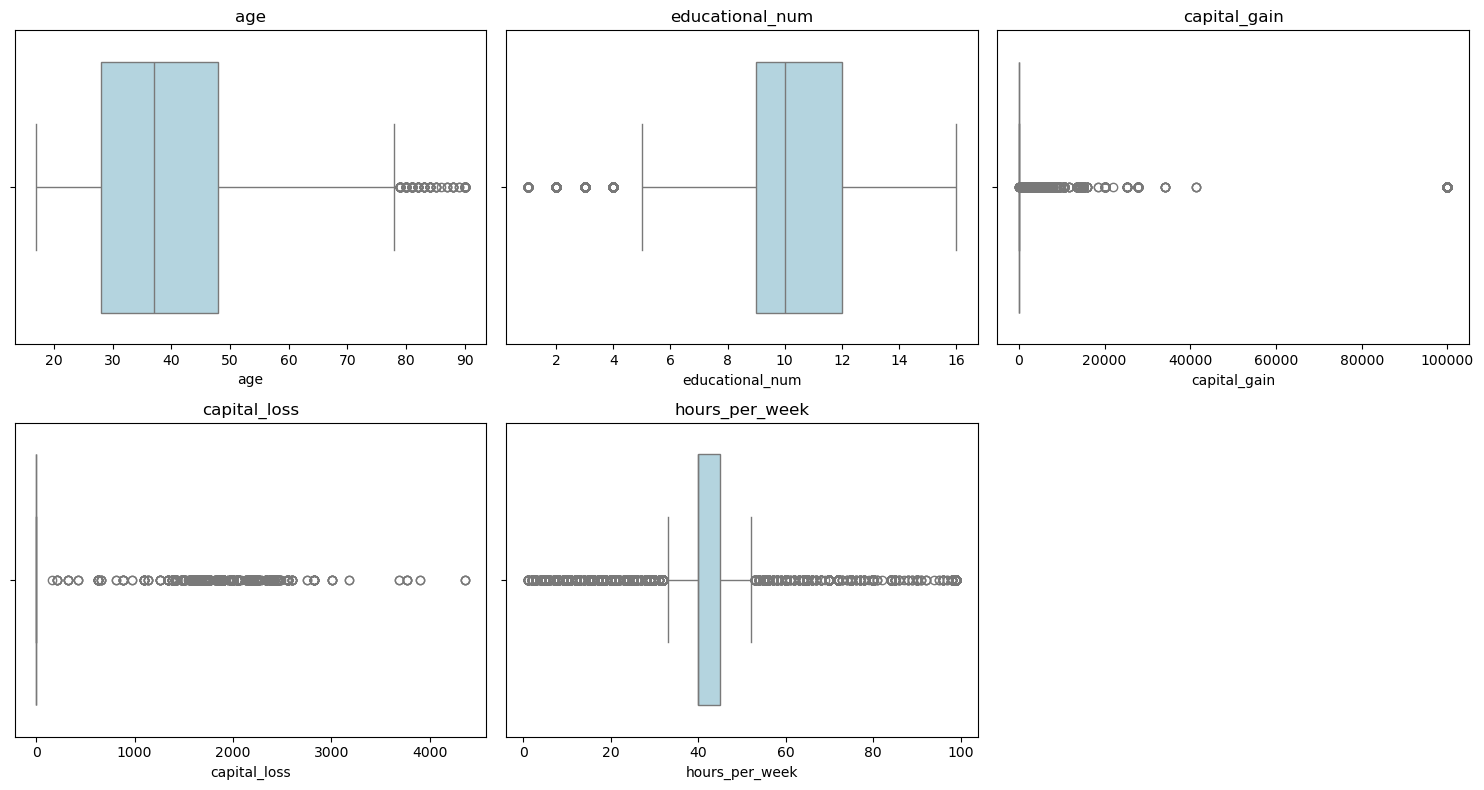

In [13]:
# Step 8: Outlier detection (boxplots)
numeric_cols = ['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']

plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()


In [14]:
# Step 9: Outlier capping
# Cap age at 80
df['age'] = np.where(df['age'] > 80, 80, df['age'])

# Cap hours-per-week at 80
df['hours_per_week'] = np.where(df['hours_per_week'] > 80, 80, df['hours_per_week'])

# Cap capital-gain and capital-loss at 95th percentile
cap_gain = df['capital_gain'].quantile(0.95)
cap_loss = df['capital_loss'].quantile(0.95)

df['capital_gain'] = np.where(df['capital_gain'] > cap_gain, cap_gain, df['capital_gain'])
df['capital_loss'] = np.where(df['capital_loss'] > cap_loss, cap_loss, df['capital_loss'])

# Log transform for skewed columns (add 1 to avoid log(0))
df['capital_gain'] = np.log1p(df['capital_gain'])
df['capital_loss'] = np.log1p(df['capital_loss'])

print("Outlier handling done (capped & log-transformed).")


Outlier handling done (capped & log-transformed).


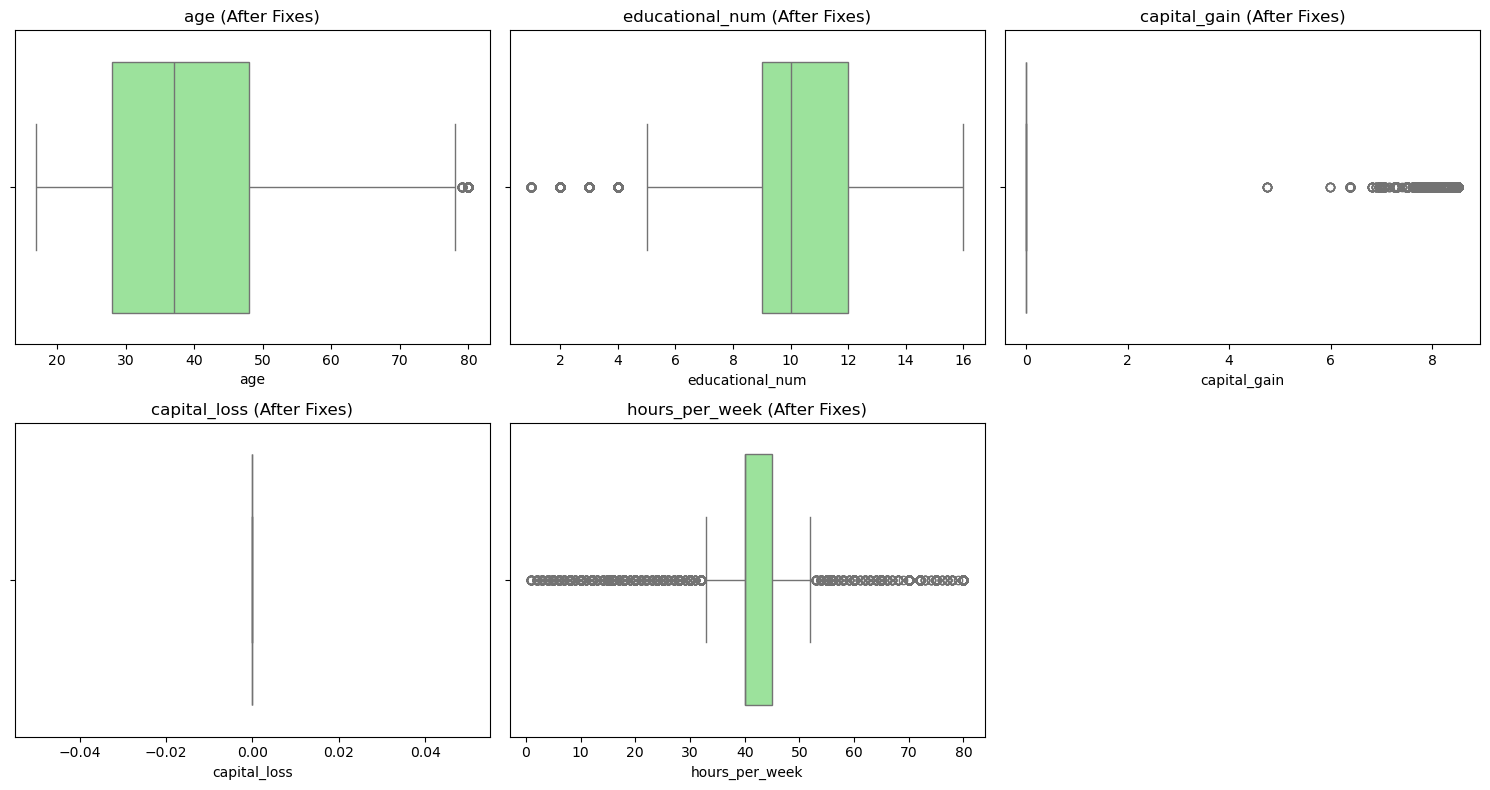

In [15]:
# Step 10: Boxplots after capping & log transformation
numeric_cols = ['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']

plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(col + " (After Fixes)")
plt.tight_layout()
plt.show()


C:\Users\heyra\AppData\Local\Temp\ipykernel_2200\769749088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, palette='Set2')


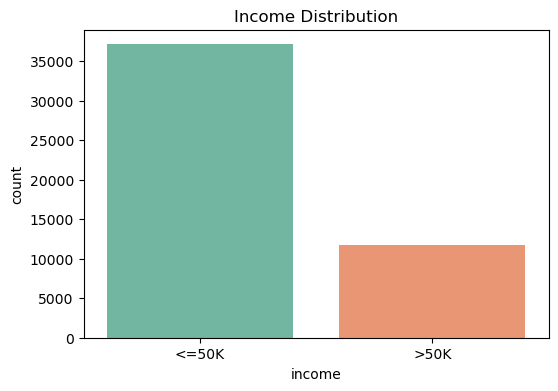


Class distribution:
income
<=50K    37109
>50K     11681
Name: count, dtype: int64


In [16]:
# Step 11: Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df, palette='Set2')
plt.title('Income Distribution')
plt.show()

print("\nClass distribution:")
print(df['income'].value_counts())


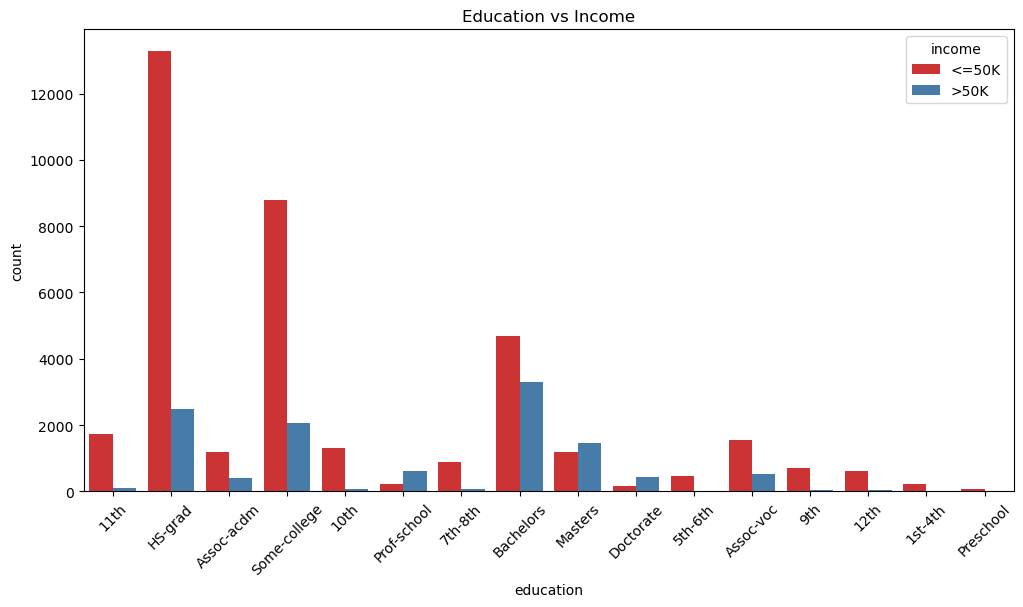

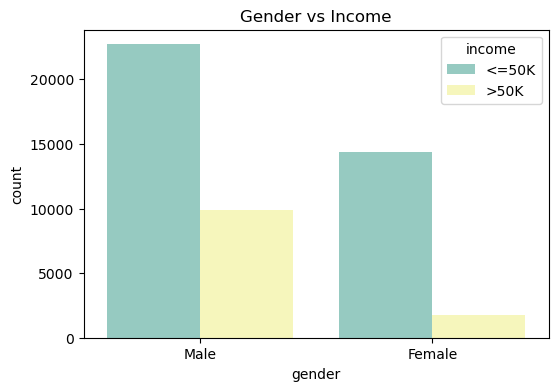

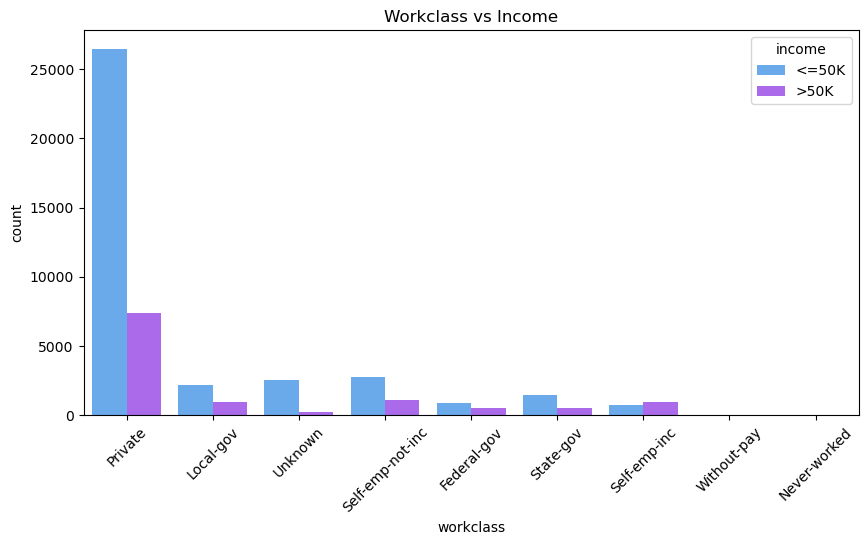

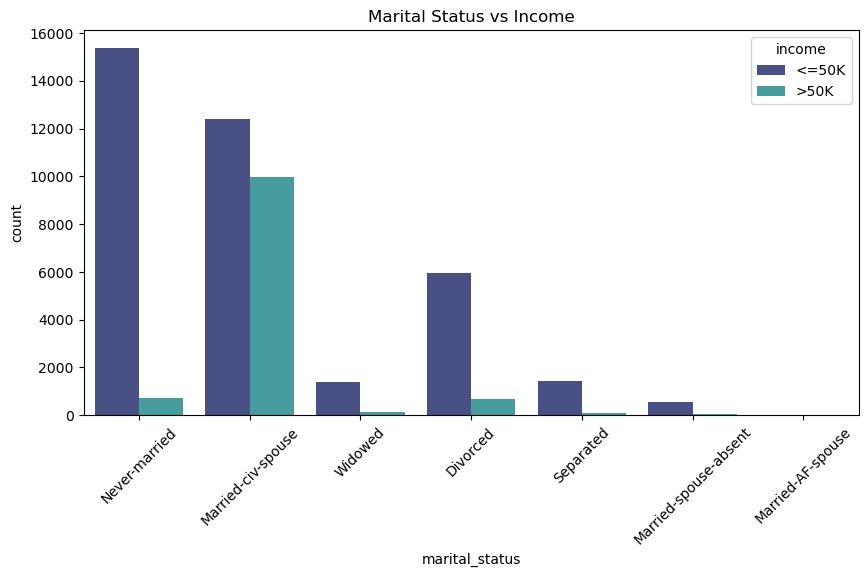

In [17]:
# Education vs Income
plt.figure(figsize=(12,6))
sns.countplot(x='education', hue='income', data=df, palette='Set1')
plt.title('Education vs Income')
plt.xticks(rotation=45)
plt.show()

# Gender vs Income
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='income', data=df, palette='Set3')
plt.title('Gender vs Income')
plt.show()

# Workclass vs Income
plt.figure(figsize=(10,5))
sns.countplot(x='workclass', hue='income', data=df, palette='cool')
plt.title('Workclass vs Income')
plt.xticks(rotation=45)
plt.show()

# Marital Status vs Income
plt.figure(figsize=(10,5))
sns.countplot(x='marital_status', hue='income', data=df, palette='mako')
plt.title('Marital Status vs Income')
plt.xticks(rotation=45)
plt.show()



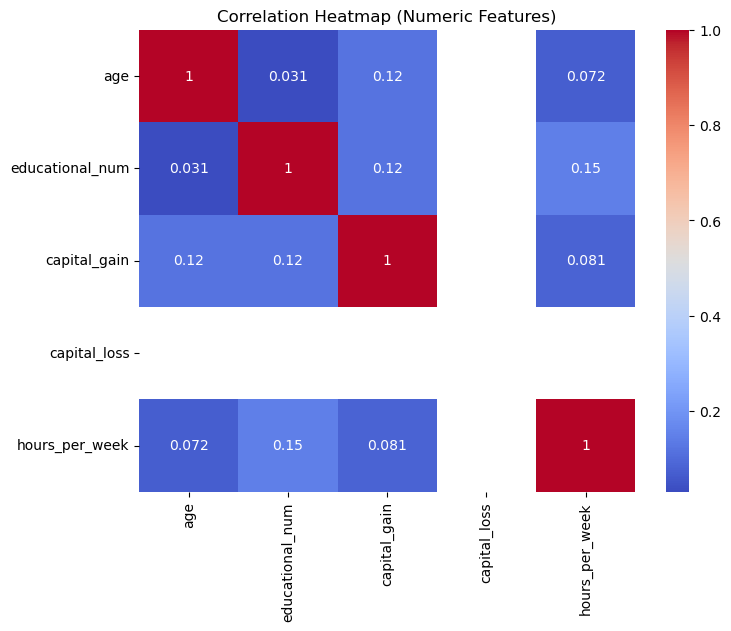

In [18]:
# Step 13: Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[['age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()


In [19]:
print("Unique values in capital_loss:", df['capital_loss'].nunique())
print("Top 10 most common values:\n", df['capital_loss'].value_counts().head(10))


Unique values in capital_loss: 1
Top 10 most common values:
 capital_loss
0.0    48790
Name: count, dtype: int64


In [20]:
# Drop capital_loss (constant feature)
df = df.drop(columns=['capital_loss'])
print("Columns after dropping capital_loss:", df.columns)


Columns after dropping capital_loss: Index(['age', 'workclass', 'education', 'educational_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')


In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# 1. Convert target to binary
df['income'] = df['income'].map({'<=50K':0, '>50K':1})

# 2. Separate features & target
X = df.drop('income', axis=1)
y = df['income']

In [22]:
# 3. Identify categorical & numeric columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

# 4. Preprocessor: Scaling numeric + One-hot encoding categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

Categorical columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']
Numerical columns: ['age', 'educational_num', 'capital_gain', 'hours_per_week']


In [23]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (39032, 12)
Test shape: (9758, 12)


In [24]:
from imblearn.over_sampling import SMOTE

# First: Fit preprocessor on training data & transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Then: Apply SMOTE on the processed training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())



Before SMOTE: income
0    29687
1     9345
Name: count, dtype: int64
After SMOTE: income
1    29687
0    29687
Name: count, dtype: int64


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Train Logistic Regression on SMOTE data
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)

# Predictions
y_pred = log_reg.predict(X_test_processed)
y_pred_proba = log_reg.predict_proba(X_test_processed)[:,1]

# Evaluation
print("Logistic Regression (SMOTE) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression (SMOTE) Results:
Accuracy: 0.796987087517934
ROC-AUC: 0.8932623888901194

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85      7422
           1       0.55      0.84      0.67      2336

    accuracy                           0.80      9758
   macro avg       0.75      0.81      0.76      9758
weighted avg       0.85      0.80      0.81      9758



In [26]:
# Logistic Regression with Class Weights
log_reg_weighted = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg_weighted.fit(preprocessor.fit_transform(X_train), y_train)

# Predictions
y_pred_w = log_reg_weighted.predict(preprocessor.transform(X_test))
y_pred_proba_w = log_reg_weighted.predict_proba(preprocessor.transform(X_test))[:,1]

# Evaluation
print("Logistic Regression (Class Weights) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_w))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_w))
print("\nClassification Report:\n", classification_report(y_test, y_pred_w))


Logistic Regression (Class Weights) Results:
Accuracy: 0.7945275671244107
ROC-AUC: 0.8939424062764163

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85      7422
           1       0.55      0.84      0.66      2336

    accuracy                           0.79      9758
   macro avg       0.74      0.81      0.76      9758
weighted avg       0.85      0.79      0.81      9758



In [27]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree on SMOTE data
dt_smote = DecisionTreeClassifier(max_depth=None, random_state=42)
dt_smote.fit(X_train_res, y_train_res)

# Predictions
y_pred_dt_smote = dt_smote.predict(X_test_processed)

# Evaluation
print("Decision Tree (SMOTE) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_smote))


Decision Tree (SMOTE) Results:
Accuracy: 0.7961672473867596

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      7422
           1       0.57      0.60      0.59      2336

    accuracy                           0.80      9758
   macro avg       0.72      0.73      0.73      9758
weighted avg       0.80      0.80      0.80      9758



In [28]:
# Train Decision Tree with class weights
dt_weighted = DecisionTreeClassifier(max_depth=None, class_weight='balanced', random_state=42)
dt_weighted.fit(preprocessor.fit_transform(X_train), y_train)

# Predictions
y_pred_dt_w = dt_weighted.predict(preprocessor.transform(X_test))

# Evaluation
print("Decision Tree (Class Weights) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_w))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_w))


Decision Tree (Class Weights) Results:
Accuracy: 0.7985242877638861

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      7422
           1       0.57      0.66      0.61      2336

    accuracy                           0.80      9758
   macro avg       0.73      0.75      0.74      9758
weighted avg       0.81      0.80      0.80      9758



In [29]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(preprocessor.fit_transform(X_train), y_train)

# Predictions
y_pred_rf = rf.predict(preprocessor.transform(X_test))

# Evaluation
print("Random Forest (Baseline, Class Weights) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest (Baseline, Class Weights) Results:
Accuracy: 0.82916581266653

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      7422
           1       0.64      0.64      0.64      2336

    accuracy                           0.83      9758
   macro avg       0.77      0.77      0.77      9758
weighted avg       0.83      0.83      0.83      9758



In [31]:
from xgboost import XGBClassifier

# Compute scale_pos_weight = (negative samples / positive samples)
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

# Train XGBoost
xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(preprocessor.fit_transform(X_train), y_train)

# Predictions
y_pred_xgb = xgb.predict(preprocessor.transform(X_test))

# Evaluation
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Results:
Accuracy: 0.8152285304365648

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87      7422
           1       0.58      0.86      0.69      2336

    accuracy                           0.82      9758
   macro avg       0.76      0.83      0.78      9758
weighted avg       0.86      0.82      0.83      9758



In [34]:
import pickle

# Save the preprocessor and trained model
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

with open("rf_salary_model.pkl", "wb") as f:
    pickle.dump(rf, f)
